# **1) Initiall insctructions**

In [1]:
!pip install -q -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt

# **2) Training-data process**

In [4]:
set_random_seed(13)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


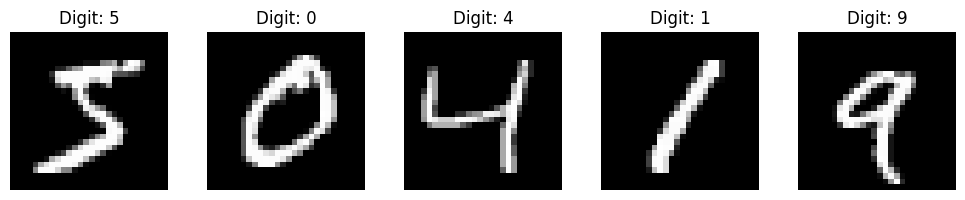

In [5]:
#Code to display few images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Digit: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# **3) Models architecture screening**

In [7]:
list_of_models = []



model1 = Sequential()
model1.add(InputLayer(shape=(28, 28, 1)))
model1.add(Conv2D(32, (3, 3), activation='relu', use_bias=True))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu', use_bias=True))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', use_bias=True))
model1.add(Dropout(0.4))
model1.add(Dense(10, activation='softmax'))
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2 = Sequential()
model2.add(InputLayer(shape=(28, 28, 1)))
model2.add(Conv2D(32, (3, 3), activation='relu', use_bias=True))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', use_bias=True))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', use_bias=True))
model2.add(Dropout(0.4))
model2.add(Dense(256, activation='relu', use_bias=True))
model2.add(Dropout(0.4))
model2.add(Dense(128, activation='relu', use_bias=True))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model3 = Sequential()
model3.add(InputLayer(shape=(28, 28, 1)))
model3.add(Conv2D(16, (3, 3), activation='relu', use_bias=True))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu', use_bias=True))
model3.add(Flatten())
model3.add(Dense(128, activation='relu', use_bias=True))
model3.add(Dropout(0.4))
model3.add(Dense(10, activation='softmax'))
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model4 = Sequential()
model4.add(InputLayer(shape=(28, 28, 1)))
model4.add(Conv2D(32, (3, 3), activation='relu', use_bias=True))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(64, (3, 3), activation='relu', use_bias=True))
model4.add(Flatten())
model4.add(Dense(128, activation='relu', use_bias=True))
model4.add(Dropout(0.4))
model4.add(Dense(10, activation='softmax'))
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model5 = Sequential()
model5.add(InputLayer(shape=(28, 28, 1)))
model5.add(Conv2D(32, (3, 3), activation='relu', use_bias=True))
model5.add(MaxPooling2D((2, 2)))
model5.add(Conv2D(64, (3, 3), activation='relu', use_bias=True))
model5.add(MaxPooling2D((2, 2)))
model5.add(Conv2D(32, (3, 3), activation='relu', use_bias=True))
model5.add(MaxPooling2D((2, 2)))
model5.add(Flatten())
model5.add(Dense(128, activation='relu', use_bias=True))
model5.add(Dropout(0.4))
model5.add(Dense(256, activation='relu', use_bias=True))
model5.add(Dropout(0.4))
model5.add(Dense(512, activation='relu', use_bias=True))
model5.add(Dropout(0.4))
model5.add(Dense(128, activation='relu', use_bias=True))
model5.add(Dropout(0.4))
model5.add(Dense(10, activation='softmax'))
model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model6 = Sequential()
model6.add(InputLayer(shape=(28, 28, 1)))
model6.add(Conv2D(16, (3, 3), activation='relu', use_bias=True))
model6.add(MaxPooling2D((2, 2)))
model6.add(Conv2D(32, (3, 3), activation='relu', use_bias=True))
model6.add(Flatten())
model6.add(Dense(64, activation='relu', use_bias=True))
model6.add(Dropout(0.4))
model6.add(Dense(128, activation='relu', use_bias=True))
model6.add(Dropout(0.4))
model6.add(Dense(64, activation='relu', use_bias=True))
model6.add(Dropout(0.4))
model6.add(Dense(10, activation='softmax'))
model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model7 = Sequential()
model7.add(InputLayer(shape=(28, 28, 1)))
model7.add(Conv2D(64, (3, 3), activation='relu', use_bias=True))
model7.add(MaxPooling2D((2, 2)))
model7.add(Conv2D(128, (3, 3), activation='relu', use_bias=True))
model7.add(Flatten())
model7.add(Dense(256, activation='relu', use_bias=True))
model7.add(Dropout(0.4))
model7.add(Dense(512, activation='relu', use_bias=True))
model7.add(Dropout(0.4))
model7.add(Dense(256, activation='relu', use_bias=True))
model7.add(Dropout(0.4))
model7.add(Dense(10, activation='softmax'))
model7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model8 = Sequential()
model8.add(InputLayer(shape=(28, 28, 1)))
model8.add(Conv2D(32, (3, 3), activation='relu', use_bias=True))
model8.add(MaxPooling2D((2, 2)))
model8.add(Flatten())
model8.add(Dense(128, activation='relu', use_bias=True))
model8.add(Dropout(0.4))
model8.add(Dense(10, activation='softmax'))
model8.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model9 = Sequential()
model9.add(InputLayer(shape=(28, 28, 1)))
model9.add(Conv2D(64, (3, 3), activation='relu', use_bias=True))
model9.add(MaxPooling2D((2, 2)))
model9.add(Flatten())
model9.add(Dense(128, activation='relu', use_bias=True))
model9.add(Dropout(0.4))
model9.add(Dense(10, activation='softmax'))
model9.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model10 = Sequential()
model10.add(InputLayer(shape=(28, 28, 1)))
model10.add(Conv2D(32, (3, 3), activation='relu', use_bias=True))
model10.add(MaxPooling2D((2, 2)))
model10.add(Conv2D(64, (3, 3), activation='relu', use_bias=True))
model10.add(MaxPooling2D((2, 2)))
model10.add(Flatten())
model10.add(Dense(256, activation='relu', use_bias=True))
model10.add(Dropout(0.4))
model10.add(Dense(128))
model10.add(Dropout(0.4))
model10.add(Dense(64, activation='relu'))
model10.add(Dropout(0.4))
model10.add(Dense(32, activation='relu'))
model10.add(Dropout(0.4))
model10.add(Dense(10, activation='softmax'))
model10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model11 = Sequential()
model11.add(InputLayer(shape=(28, 28, 1)))
model11.add(Conv2D(32, (3, 3), activation='relu', use_bias=True))
model11.add(MaxPooling2D((2, 2)))
model11.add(Conv2D(64, (3, 3), activation='relu', use_bias=True))
model11.add(MaxPooling2D((2, 2)))
model11.add(Flatten())
model11.add(Dense(32, activation='relu', use_bias=True))
model11.add(Dropout(0.4))
model11.add(Dense(64))
model11.add(Dropout(0.4))
model11.add(Dense(128, activation='relu'))
model11.add(Dropout(0.4))
model11.add(Dense(256, activation='relu'))
model11.add(Dropout(0.4))
model11.add(Dense(10, activation='softmax'))
model11.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model12 = Sequential()
model12.add(InputLayer(shape=(28, 28, 1)))
model12.add(Conv2D(32, (3, 3), activation='relu', use_bias=True))
model12.add(MaxPooling2D((2, 2)))
model12.add(Conv2D(64, (3, 3), activation='relu', use_bias=True))
model12.add(MaxPooling2D((2, 2)))
model12.add(Flatten())
model12.add(Dense(100, activation='relu', use_bias=True))
model12.add(Dropout(0.4))
model12.add(Dense(10, activation='softmax'))
model12.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model13 = Sequential()
model13.add(InputLayer(shape=(28, 28, 1)))
model13.add(Conv2D(32, (3, 3), activation='relu', use_bias=True))
model13.add(MaxPooling2D((2, 2)))
model13.add(Conv2D(64, (3, 3), activation='relu', use_bias=True))
model13.add(MaxPooling2D((2, 2)))
model13.add(Flatten())
model13.add(Dense(200, activation='relu', use_bias=True))
model13.add(Dropout(0.4))
model13.add(Dense(100, activation='relu', use_bias=True))
model13.add(Dropout(0.4))
model13.add(Dense(10, activation='softmax'))
model13.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model14 = Sequential()
model14.add(InputLayer(shape=(28, 28, 1)))
model14.add(Conv2D(32, (3, 3), activation='relu', use_bias=True))
model14.add(MaxPooling2D((2, 2)))
model14.add(Conv2D(64, (3, 3), activation='relu', use_bias=True))
model14.add(MaxPooling2D((2, 2)))
model14.add(Flatten())
model14.add(Dense(100, activation='relu', use_bias=True))
model14.add(Dropout(0.4))
model14.add(Dense(200, activation='relu', use_bias=True))
model14.add(Dropout(0.4))
model14.add(Dense(10, activation='softmax'))
model14.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model15 = Sequential()
model15.add(InputLayer(shape=(28, 28, 1)))
model15.add(Conv2D(32, (3, 3), activation='relu', use_bias=True))
model15.add(MaxPooling2D((2, 2)))
model15.add(Conv2D(64, (3, 3), activation='relu', use_bias=True))
model15.add(MaxPooling2D((2, 2)))
model15.add(Flatten())
model15.add(Dense(100, activation='relu', use_bias=True))
model15.add(Dropout(0.4))
model15.add(Dense(200, activation='relu', use_bias=True))
model15.add(Dropout(0.4))
model15.add(Dense(100, activation='relu', use_bias=True))
model15.add(Dropout(0.4))
model15.add(Dense(10, activation='softmax'))
model15.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model16 = Sequential()
model16.add(InputLayer(shape=(28, 28, 1)))
model16.add(Conv2D(32, (3, 3), activation='relu', use_bias=True))
model16.add(MaxPooling2D((2, 2)))
model16.add(Conv2D(64, (3, 3), activation='relu', use_bias=True))
model16.add(MaxPooling2D((2, 2)))
model16.add(Flatten())
model16.add(Dense(200, activation='relu', use_bias=True))
model16.add(Dropout(0.4))
model16.add(Dense(100, activation='relu', use_bias=True))
model16.add(Dropout(0.4))
model16.add(Dense(200, activation='relu', use_bias=True))
model16.add(Dropout(0.4))
model16.add(Dense(10, activation='softmax'))
model16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


list_of_models.append(model1)
list_of_models.append(model2)
list_of_models.append(model3)
list_of_models.append(model4)
list_of_models.append(model5)
list_of_models.append(model6)
list_of_models.append(model7)
list_of_models.append(model8)
list_of_models.append(model9)
list_of_models.append(model10)
list_of_models.append(model11)
list_of_models.append(model12)
list_of_models.append(model13)
list_of_models.append(model14)
list_of_models.append(model15)
list_of_models.append(model16)

In [8]:
list_of_histories = []

for elem in list_of_models:
  history =  elem.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=False)
  list_of_histories.append(history)

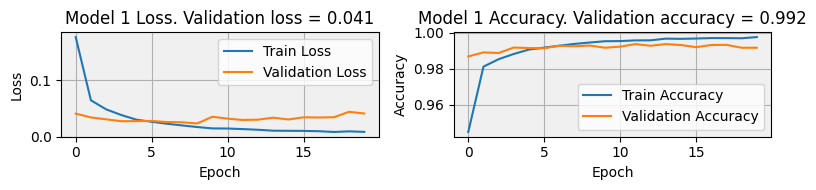

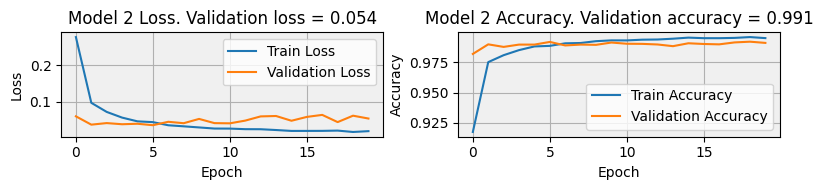

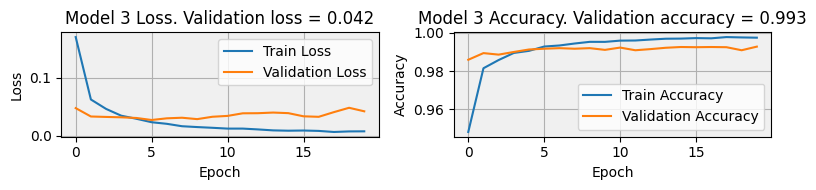

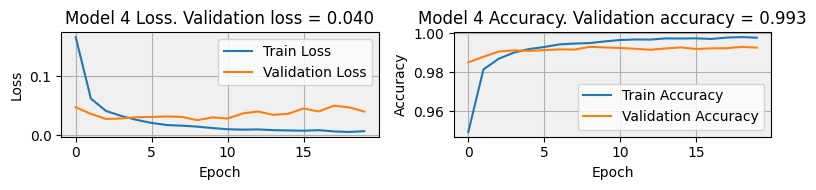

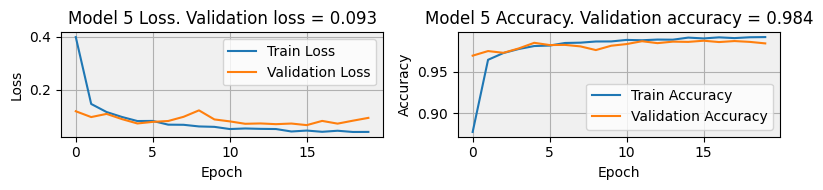

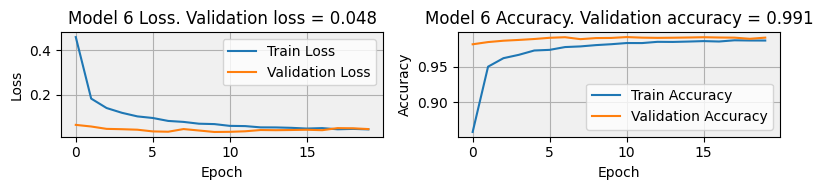

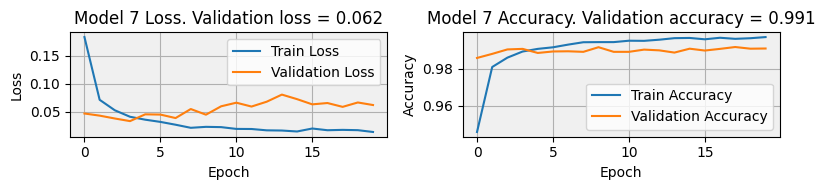

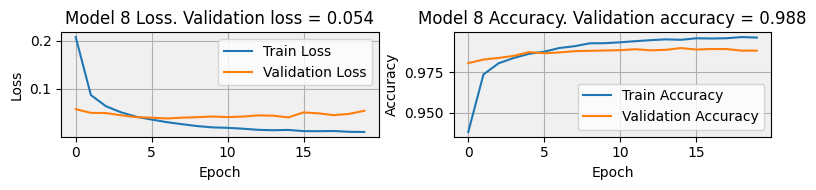

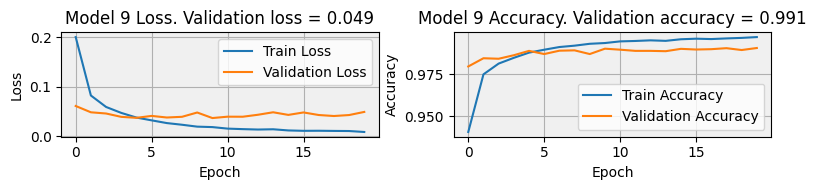

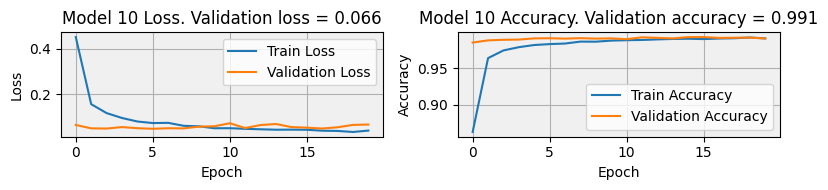

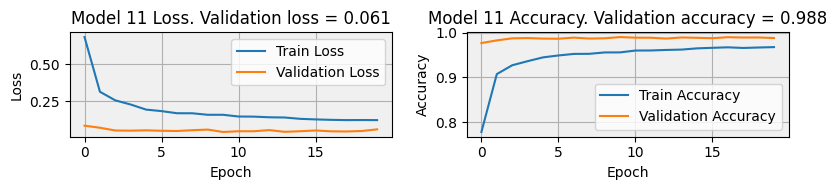

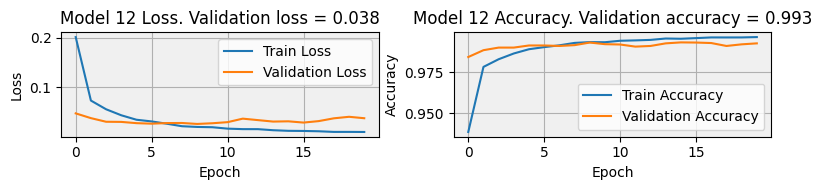

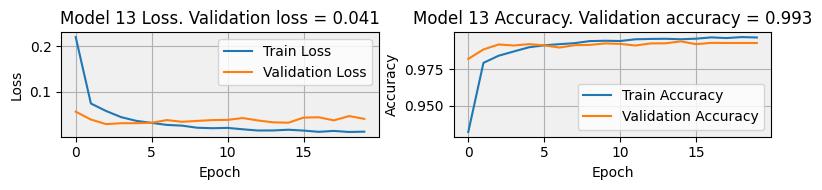

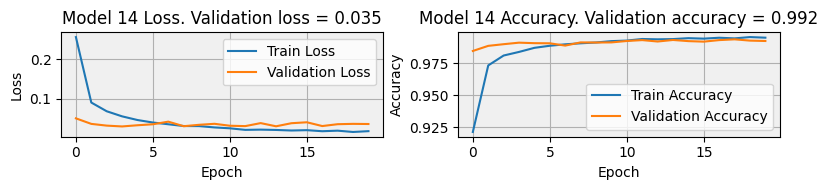

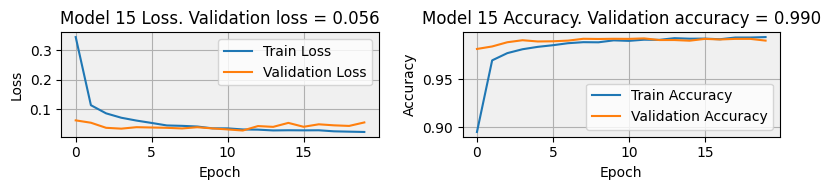

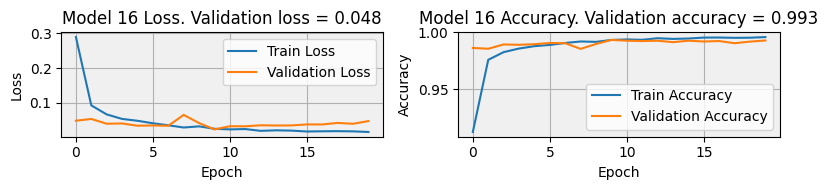

In [9]:
for i, history in enumerate(list_of_histories):
    plt.figure(figsize=(8, 2))

    # Plots for Losses
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model {i+1} Loss. Validation loss = {history.history["val_loss"][-1]:.3f}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    plt.gca().set_facecolor('#f0f0f0')
    plt.legend()

    # Plots for Accuracies
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model {i+1} Accuracy. Validation accuracy = {history.history["val_accuracy"][-1]:.3f}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.gca().set_facecolor('#f0f0f0')
    plt.legend()

    plt.tight_layout()
    plt.show()

# **4) Model 12 optimization**

In [10]:
def model_builder(hp):

  hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
  hp_Denselayer_1 = hp.Choice('Denselayer_1', values = [i for i in range(100, 1001, 100 )])
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4, 1e-5])

  model12_hp = Sequential()
  model12_hp.add(InputLayer(shape=(28, 28, 1)))
  model12_hp.add(Conv2D(32, (3, 3), activation=hp_activation, use_bias=True))
  model12_hp.add(MaxPooling2D((2, 2)))
  model12_hp.add(Conv2D(64, (3, 3), activation=hp_activation, use_bias=True))
  model12_hp.add(MaxPooling2D((2, 2)))
  model12_hp.add(Flatten())
  model12_hp.add(Dense(units=hp_Denselayer_1, activation=hp_activation, use_bias=True))
  model12_hp.add(Dropout(0.4))
  model12_hp.add(Dense(10, activation='softmax'))
  optimizer = Adam(learning_rate=hp_learning_rate)
  model12_hp.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


  return model12_hp

In [11]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='dir_name',
                     project_name='project_name')

stop_early = EarlyStopping(monitor='val_loss', patience=3)

In [12]:
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

Trial 30 Complete [00h 01m 16s]
val_accuracy: 0.9729166626930237

Best val_accuracy So Far: 0.9915000200271606
Total elapsed time: 00h 15m 08s


In [13]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2,
                    callbacks=[stop_early])

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8588 - loss: 0.4570 - val_accuracy: 0.9818 - val_loss: 0.0600
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9750 - loss: 0.0828 - val_accuracy: 0.9869 - val_loss: 0.0432
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9822 - loss: 0.0566 - val_accuracy: 0.9864 - val_loss: 0.0458
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9852 - loss: 0.0484 - val_accuracy: 0.9887 - val_loss: 0.0415
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9893 - loss: 0.0376 - val_accuracy: 0.9905 - val_loss: 0.0357
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9893 - loss: 0.0334 - val_accuracy: 0.9908 - val_loss: 0.0362
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9910 - loss: 0.0282 - val_accuracy: 0.9908 - val_loss: 0.0375
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9924 - loss: 0.0248 - 

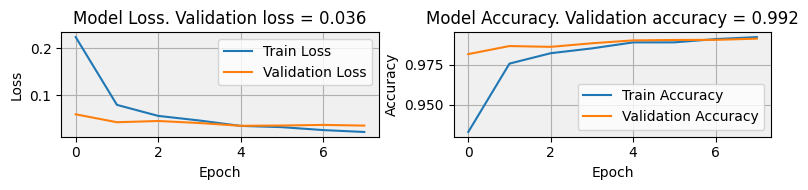

In [15]:
# Plots for Losses
plt.figure(figsize=(8, 2))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'Model Loss. Validation loss = {history.history["val_loss"][-1]:.3f}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.gca().set_facecolor('#f0f0f0')
plt.legend()

# Plots for Accuracies
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'Model Accuracy. Validation accuracy = {history.history["val_accuracy"][-1]:.3f}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.gca().set_facecolor('#f0f0f0')
plt.legend()

plt.tight_layout()
plt.show()

# **5) Test-data processing and prediction**

In [17]:
data_test = pd.read_csv('/content/drive/MyDrive/MNIST_Kaggle/test_mnist.csv.zip')
df_test = pd.DataFrame(data_test)

In [18]:
reshaped_images = []
for index, row in df_test.iterrows():
    reshaped_image = row.values.reshape((28, 28, 1))
    reshaped_images.append(reshaped_image)

In [19]:
reshaped_images = np.array(reshaped_images)

In [20]:
reshaped_images = reshaped_images.astype('float32') / 255.0
reshaped_images.shape

(28000, 28, 28, 1)

In [21]:
#model12 gave me better output than optimized model12 (model12_hp), hence I used model12 for predicition
prediction = model12.predict(reshaped_images)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [22]:
prediction_labels = []
for elem in prediction:
  prediction_labels.append(np.argmax(elem))

In [23]:
sample_submission = pd.read_csv('/content/drive/MyDrive/MNIST_Kaggle/sample_submission_mnist.csv')
df_submission = pd.DataFrame(sample_submission)

df_submission['Label'] = prediction_labels

In [24]:
os.chdir('/content/drive/MyDrive/MNIST_Kaggle')
!pwd
df_submission.to_csv('final_submission_mnist.csv', index=False)

/content/drive/MyDrive/MNIST_Kaggle
